# R2 Rant / Caution

This is a loose collection of examples of where R2 might not be great. Most of them boil down to non-normal distributions. This blog is illustrative, but not as much of a gotcha as the author thinks it is. R2 is not bad, but it might be over used. Feel free to send feedback to tmartin at ucar dot edu. 

[Is R-squared Useless?](https://library.virginia.edu/data/articles/is-r-squared-useless)

#### Always plot your data!

In [1]:
# Data manipulation and analysis
# import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical operations
import numpy as np

# Machine learning libraries
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Statistical functions
from scipy import stats
from scipy.stats import linregress


### Scikit-learn

The R2 example from scikit learn:

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


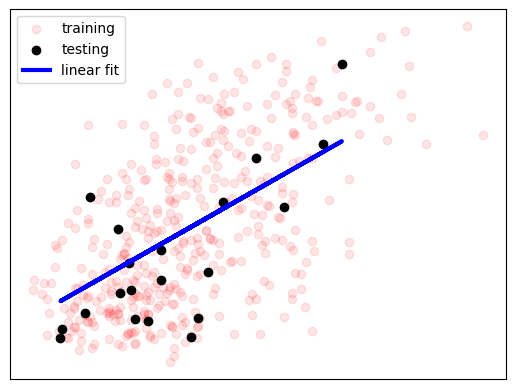

In [2]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train, color="red", alpha=0.1, label='training')
plt.scatter(diabetes_X_test, diabetes_y_test, color="black", label='testing')
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3, label='linear fit')
plt.legend()
plt.xticks(())
plt.yticks(())

plt.show()

This does this in a very scikit-learn way, seperating out training and testing datasets. 

### SciPy

Coefficients: 
 938.2378612513518
Mean squared error: 2548.07
Coefficient of determination: 0.47


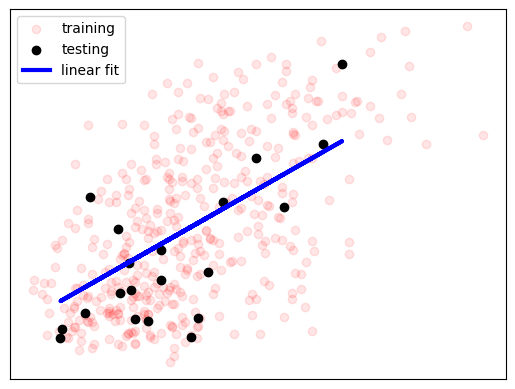

In [3]:

# Fit a linear regression model
slope, intercept, _, _, _ = linregress(diabetes_X_train.flatten(), diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = slope * diabetes_X_test.flatten() + intercept

# The coefficients
print("Coefficients: \n", slope)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train, color="red", alpha=0.1, label='training')
plt.scatter(diabetes_X_test, diabetes_y_test, color="black", label='testing')
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3, label='linear fit')
plt.legend()
plt.xticks(())
plt.yticks(())

plt.show()

# Example #1

First let's load Anscombe's quartet: https://en.wikipedia.org/wiki/Anscombe%27s_quartet

In [4]:
# Dataset
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])

y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

# note the different X's
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])

y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

Dataset 1 - Slope: 0.50, Intercept: 3.00, R-squared: 0.67
Dataset 2 - Slope: 0.50, Intercept: 3.00, R-squared: 0.67
Dataset 3 - Slope: 0.50, Intercept: 3.00, R-squared: 0.67
Dataset 4 - Slope: 0.50, Intercept: 3.00, R-squared: 0.67


Text(0.04, 0.5, 'Y')

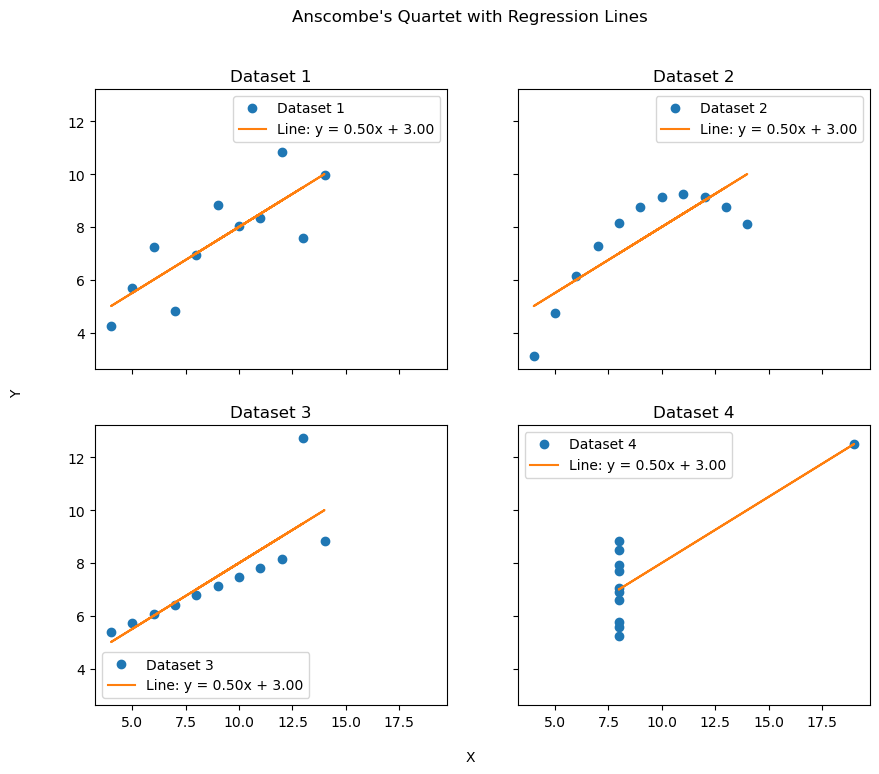

In [5]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

# Function to calculate slope and R-squared
def calculate_line_parameters(x, y):
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    slope = model.coef_[0]
    intercept = model.intercept_
    y_pred = model.predict(x.reshape(-1, 1))
    r2 = r2_score(y, y_pred)
    return slope, intercept, r2

# Plot each dataset with a line of best fit
for ax, x_data, y_data, label in zip(axes.flatten(), [x, x, x, x4], [y1, y2, y3, y4], ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']):
    slope, intercept, r2 = calculate_line_parameters(x_data, y_data)
    ax.plot(x_data, y_data, 'o', label=label)
    ax.plot(x_data, slope * x_data + intercept, label=f'Line: y = {slope:.2f}x + {intercept:.2f}')
    ax.set_title(label)
    ax.legend()

    print(f"{label} - Slope: {slope:.2f}, Intercept: {intercept:.2f}, R-squared: {r2:.2f}")

# Add a global title
plt.suptitle("Anscombe's Quartet with Regression Lines")

# Set common labels
fig.text(0.5, 0.04, 'X', ha='center')
fig.text(0.04, 0.5, 'Y', va='center', rotation='vertical')

Let's make some perfect data!

In [6]:
# perfect_y = slope * x_values + intercept
perfect_y_for_x = 0.5*x+3
perfect_y_for_x4 = 0.5*x4+3

x perfect - Slope: 0.50, Intercept: 3.00, R-squared: 1.00
x4 perfect - Slope: 0.50, Intercept: 3.00, R-squared: 1.00


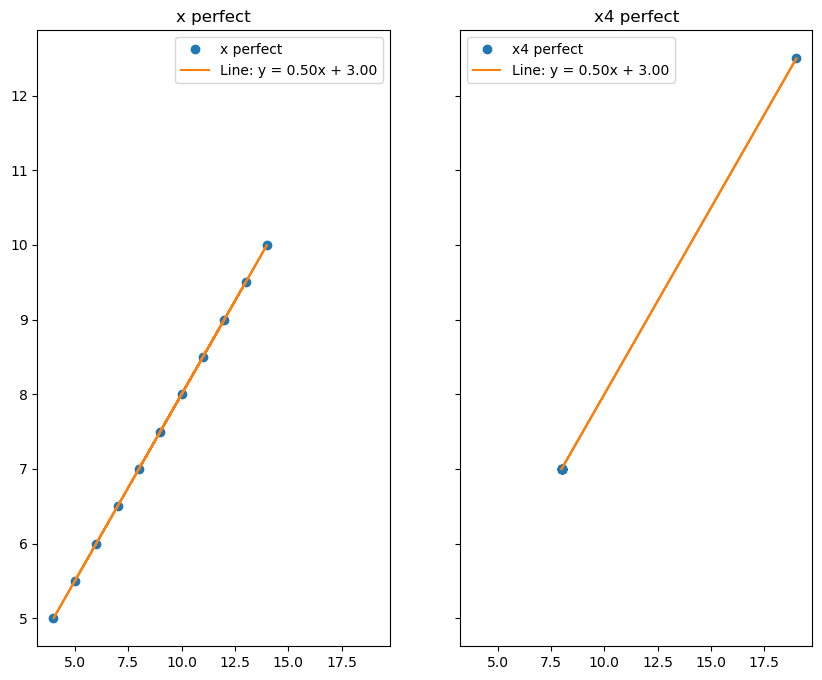

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharex=True, sharey=True)

# Function to calculate slope and R-squared
def calculate_line_parameters(x, y):
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    slope = model.coef_[0]
    intercept = model.intercept_
    y_pred = model.predict(x.reshape(-1, 1))
    r2 = r2_score(y, y_pred)
    return slope, intercept, r2

# Plot each dataset with a line of best fit
for ax, x_data, y_data, label in zip(axes.flatten(), [x, x4], [perfect_y_for_x, perfect_y_for_x4], ['x perfect', 'x4 perfect']):
    slope, intercept, r2 = calculate_line_parameters(x_data, y_data)
    ax.plot(x_data, y_data, 'o', label=label)
    ax.plot(x_data, slope * x_data + intercept, label=f'Line: y = {slope:.2f}x + {intercept:.2f}')
    ax.set_title(label)
    ax.legend()

    print(f"{label} - Slope: {slope:.2f}, Intercept: {intercept:.2f}, R-squared: {r2:.2f}")

So same R2, lets compare RMSE and MAE of Anscombes quartet with these perfect values:

In [8]:
def print_evaluation_metrics(actual, predicted):
    rmse = mean_squared_error(actual, predicted, squared=False)
    mae = mean_absolute_error(actual, predicted)

    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')

In [9]:
print_evaluation_metrics(perfect_y_for_x, y1)

Root Mean Squared Error (RMSE): 1.1186
Mean Absolute Error (MAE): 0.8373


In [10]:
print_evaluation_metrics(perfect_y_for_x, y2)

Root Mean Squared Error (RMSE): 1.1191
Mean Absolute Error (MAE): 0.9682


In [11]:
print_evaluation_metrics(perfect_y_for_x, y3)

Root Mean Squared Error (RMSE): 1.1183
Mean Absolute Error (MAE): 0.7164


In [12]:
print_evaluation_metrics(perfect_y_for_x4, y4)

Root Mean Squared Error (RMSE): 1.1177
Mean Absolute Error (MAE): 0.9027


Are these error metrics the same? Which is the best? What model do you like the most?

# Example #2

Worth taking some thoughts from the first statement as well.

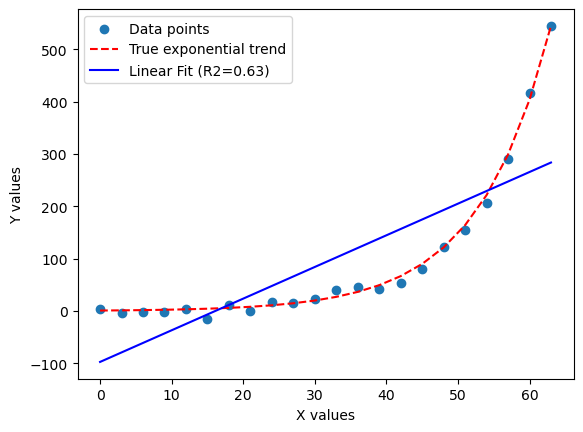

In [13]:
# Number of data points
n = 22

# Generate x values using linspace
x_values = np.linspace(0, 3 * (n - 1), n)  # Start at zero, increment by 3, and generate n points

# Generate more jittery/random noise with a weak exponential trend
noise = np.random.normal(scale=10, size=n)  # Increase the scale for more jitter

# Create a weak exponential trend
y_values = np.exp(0.1 * x_values) + noise

# Reshape x_values to a 2D array
x_values_2d = x_values.reshape(-1, 1)

# Create and fit a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(x_values_2d, y_values)

# Predict y values using the linear model
linear_fit_values = linear_reg.predict(x_values_2d)

# Calculate R-squared
r2 = r2_score(y_values, linear_fit_values)

# Plot the data
plt.scatter(x_values, y_values, label='Data points')

# Plot the true exponential trend
plt.plot(x_values, np.exp(0.1 * x_values), color='red', linestyle='--', label='True exponential trend')

# Plot the linear fit
plt.plot(x_values, linear_fit_values, color='blue', label=f'Linear Fit (R2={r2:.2f})')

# Add labels and legend
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()

# Show the plot
plt.show()

(array([3., 2., 2., 2., 2., 2., 2., 2., 2., 3.]),
 array([ 0. ,  6.3, 12.6, 18.9, 25.2, 31.5, 37.8, 44.1, 50.4, 56.7, 63. ]),
 <BarContainer object of 10 artists>)

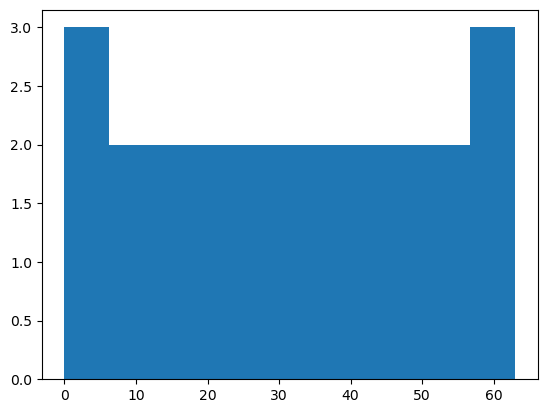

In [14]:
plt.hist(x_values)

Is the above histogram a normal distribution? What part of the curve has biases? 

Slope of the linear fit line: 0.01


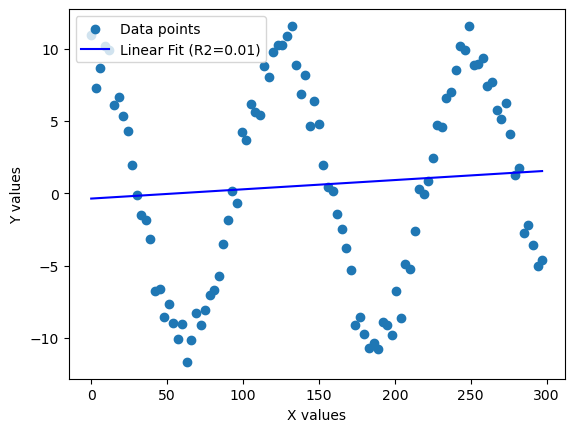

In [15]:
# Number of data points
n = 100

# Generate x values using linspace
x_values = np.linspace(0, 3 * (n - 1), n)  # Start at zero, increment by 3, and generate n points

# Generate more jittery/random noise with a weak exponential trend
noise = np.random.normal(scale=1, size=n)  # Increase the scale for more jitter

y_values = 10 * np.cos(0.05 * x_values) + noise  # Decreased frequency (0.1) to stretch out the cosine

# Reshape x_values to a 2D array
x_values_2d = x_values.reshape(-1, 1)

# Create and fit a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(x_values_2d, y_values)

# Print the slope of the linear fit line
slope = linear_reg.coef_[0]
print(f"Slope of the linear fit line: {slope:.2f}")

# Predict y values using the linear model
linear_fit_values = linear_reg.predict(x_values_2d)

# Calculate R-squared
r2 = r2_score(y_values, linear_fit_values)

# Plot the data
plt.scatter(x_values, y_values, label='Data points')

# Plot the linear fit
plt.plot(x_values, linear_fit_values, color='blue', label=f'Linear Fit (R2={r2:.2f})')

# Add labels and legend
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()

# Show the plot
plt.show()

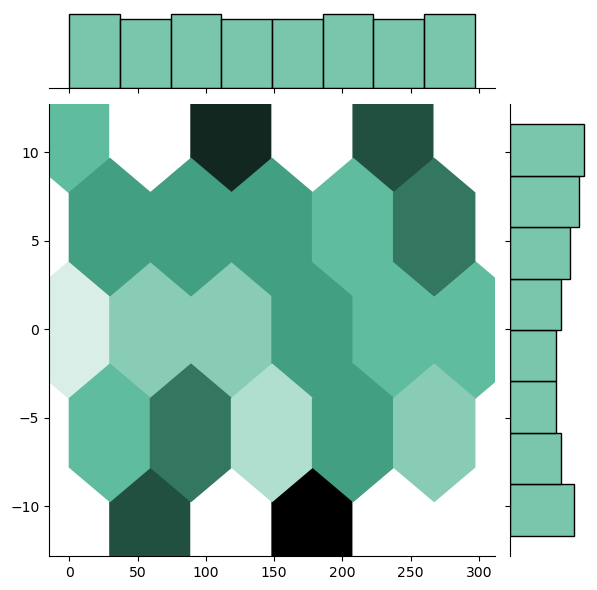

In [16]:
sns.jointplot(x=x_values, y=y_values, kind="hex", color="#4CB391")

This is an extreme example, yes you can use R2 for more than linear problems. 

# Example #3

Slope of the linear fit line for y_values: 0.94
Slope of the linear fit line for y_values_slope25: 0.25


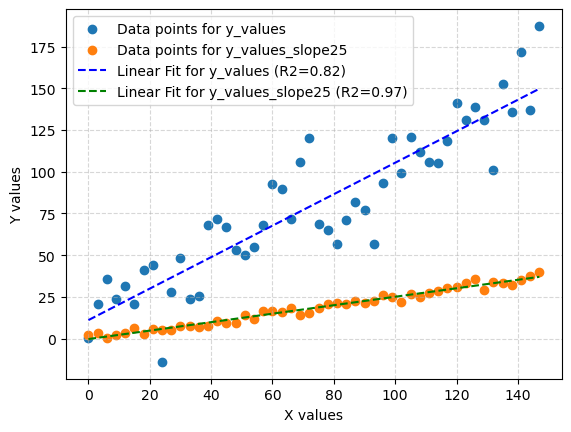

In [17]:
# Number of data points
n = 50

# Generate x values using linspace
x_values = np.linspace(0, 3 * (n - 1), n)  # Start at zero, increment by 3, and generate n points

# Generate more jittery/random noise with a weak exponential trend
noise2 = np.random.normal(scale=2, size=n)  # Increase the scale for more jitter
noise20 = np.random.normal(scale=20, size=n)  # Increase the scale for more jitter

# Generate y values with different slopes and noise
y_values = 1 * x_values + noise20
y_values_slope25 = 0.25 * x_values + noise2

# Reshape x_values to a 2D array
x_values_2d = x_values.reshape(-1, 1)

# Create and fit a linear regression model for y_values
linear_reg1 = LinearRegression()
linear_reg1.fit(x_values_2d, y_values)

# Create and fit a linear regression model for y_values_slope25
linear_reg2 = LinearRegression()
linear_reg2.fit(x_values_2d, y_values_slope25)

# Print the slopes of the linear fit lines
slope1 = linear_reg1.coef_[0]
slope2 = linear_reg2.coef_[0]
print(f"Slope of the linear fit line for y_values: {slope1:.2f}")
print(f"Slope of the linear fit line for y_values_slope25: {slope2:.2f}")

# Predict y values using the linear models
linear_fit_values1 = linear_reg1.predict(x_values_2d)
linear_fit_values2 = linear_reg2.predict(x_values_2d)

# Calculate R-squared for both fits
r2_1 = r2_score(y_values, linear_fit_values1)
r2_2 = r2_score(y_values_slope25, linear_fit_values2)

# Plot the data and fitted lines
plt.scatter(x_values, y_values, label='Data points for y_values')
plt.scatter(x_values, y_values_slope25, label='Data points for y_values_slope25')

# Plot the linear fits
plt.plot(x_values, linear_fit_values1, color='blue', linestyle='--', label=f'Linear Fit for y_values (R2={r2_1:.2f})')
plt.plot(x_values, linear_fit_values2, color='green', linestyle='--', label=f'Linear Fit for y_values_slope25 (R2={r2_2:.2f})')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Add labels and legend
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()

# Show the plot
plt.show()


So the one with a tigher fit and a better R2 score might not be the better one due to it's bias. The model that produces a slope of 1 might be a better choice. Now, if you have a great model with this sort of bias, you can probably corect it. But, if you are going to report R2, I would also report slope. 

# Example #4

Let's re-do anscombs, but use the third dataset as an example

In [18]:
# Dataset
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])

y1 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
y2 = np.array([7.46, 6.77, 9.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
y3 = np.array([7.46, 6.77, 14.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
y4 = np.array([7.46, 6.77, 16.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])


We can see in this case that changing just one datapoint can really change the line/fit. Does the R2 values correspond with the changes in MAE? 

Original - Slope: 0.50, Intercept: 3.00, R-squared: 0.67, MAE: 0.72
Minus 3 - Slope: 0.39, Intercept: 3.71, R-squared: 0.93, MAE: 0.21
Plus 2 - Slope: 0.57, Intercept: 2.53, R-squared: 0.55, MAE: 1.05
Plus 4 - Slope: 0.65, Intercept: 2.06, R-squared: 0.47, MAE: 1.39


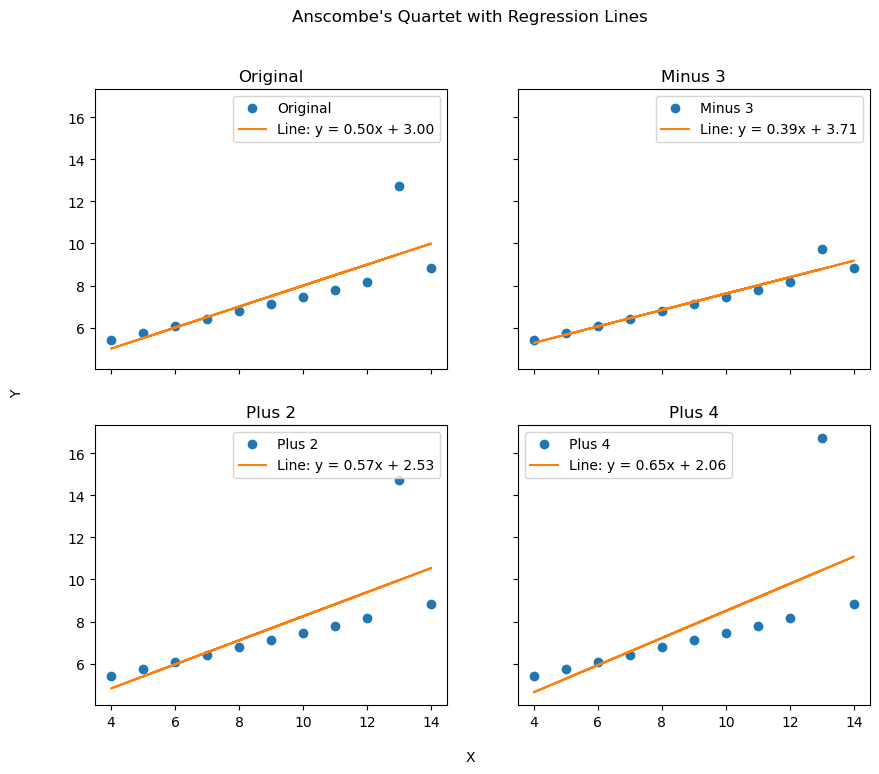

In [19]:


# Assume x, y1, y2, y3, y4 are defined

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

# Function to calculate slope, intercept, R-squared, and MAE
def calculate_line_parameters(x, y):
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    slope = model.coef_[0]
    intercept = model.intercept_
    y_pred = model.predict(x.reshape(-1, 1))
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    return slope, intercept, r2, mae

# Plot each dataset with a line of best fit
for ax, x_data, y_data, label in zip(axes.flatten(), [x, x, x, x], [y1, y2, y3, y4], ['Original', 'Minus 3', 'Plus 2', 'Plus 4']):
    slope, intercept, r2, mae = calculate_line_parameters(x_data, y_data)
    ax.plot(x_data, y_data, 'o', label=label)
    ax.plot(x_data, slope * x_data + intercept, label=f'Line: y = {slope:.2f}x + {intercept:.2f}')
    ax.set_title(label)
    ax.legend()

    print(f"{label} - Slope: {slope:.2f}, Intercept: {intercept:.2f}, R-squared: {r2:.2f}, MAE: {mae:.2f}")

# Add a global title
plt.suptitle("Anscombe's Quartet with Regression Lines")

# Set common labels
fig.text(0.5, 0.04, 'X', ha='center')
fig.text(0.04, 0.5, 'Y', va='center', rotation='vertical')

plt.show()

### Blog post re-written in python

This is not fully formed. Tried to re-create the blog post from above. The r-squared values is different right off of the bat.

In [20]:
# Set seed for reproducibility
np.random.seed(1)

# Define independent and dependent variables
x = np.arange(1, 21)
y = 2 + 0.5 * x + np.random.normal(0, 3, 20)

# Fit the linear regression model
model = stats.linregress(x, y)

# Obtain the R-squared value
r_squared = model.rvalue**2

# Print the R-squared value
print(r_squared)

0.40852855368278757


In [21]:
# Fit the linear regression model
model = stats.linregress(x, y)

# Extract fitted values
y_hat = model.intercept + model.slope * x

# Calculate sum of squares
mss = np.sum((y_hat - np.mean(y_hat))**2)
tss = np.sum((y - np.mean(y))**2)

# Calculate R-squared
r_squared = mss / tss

# Print the R-squared value
print(r_squared)

0.4085285536827877


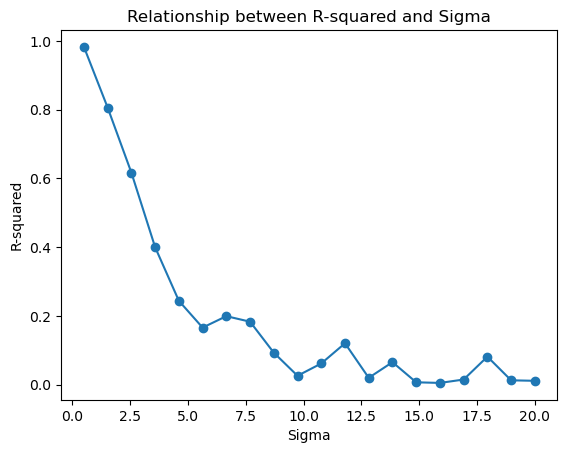

In [22]:
def r2_0(sigma):
  # Generate data
  x = np.linspace(1, 10, 100)
  y = 2 + 1.2 * x + np.random.normal(loc=0, scale=sigma, size=100)

  # Fit linear regression model
  model = stats.linregress(x, y)

  # Extract R-squared value
  r_squared = model.rvalue**2

  # Return R-squared
  return r_squared

# Define range of sigma values
sigmas = np.linspace(0.5, 20, 20)

# Calculate R-squared for each sigma
r_squared_values = np.frompyfunc(r2_0, 1, 1)(sigmas)

# Plot R-squared vs sigma
plt.plot(sigmas, r_squared_values)
plt.scatter(sigmas, r_squared_values)
plt.xlabel("Sigma")
plt.ylabel("R-squared")
plt.title("Relationship between R-squared and Sigma")
plt.show()

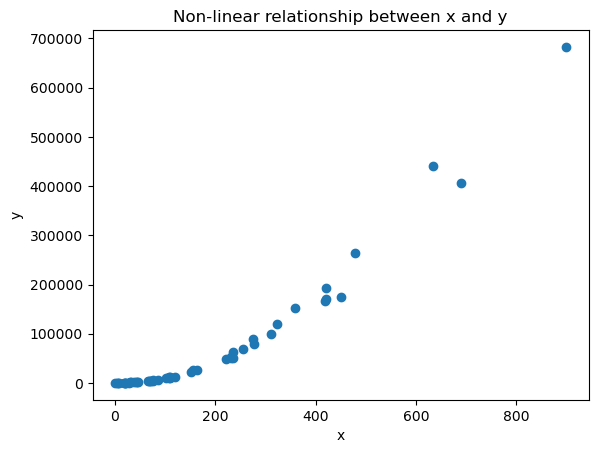

In [23]:
# Set seed for reproducibility
np.random.seed(1)

# Generate data
rate = 0.005
x = np.random.exponential(scale=1/rate, size=50)
y = ((x - 1)**2) * np.random.uniform(low=0.8, high=1.2, size=50)

# Plot the data
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Non-linear relationship between x and y")
plt.show()

In [24]:
# Fit the linear regression model
model = stats.linregress(x, y)

# Obtain the R-squared value
r_squared = model.rvalue**2
r_squared

0.8995456300458055

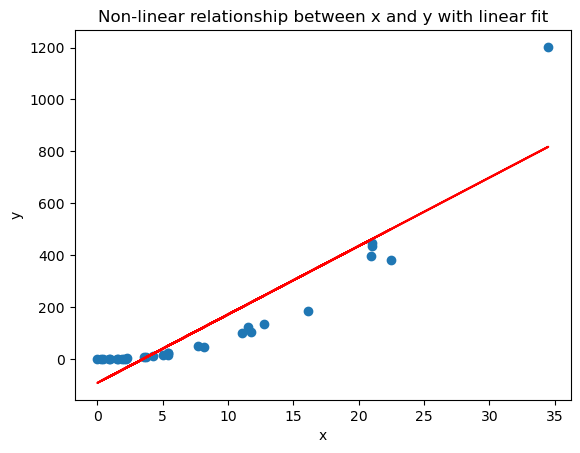

R-squared: 0.83654388858747


In [25]:

np.random.seed(1)

# Generate data
rate = 0.1
x = np.random.exponential(scale=1/rate, size=30)
y = ((x - 1)**2) * np.random.uniform(low=0.8, high=1.2, size=30)

# Fit linear regression model
model = stats.linregress(x, y)

# Calculate fitted values
y_hat = model.intercept + model.slope * x

# Plot the data and the linear fit
plt.scatter(x, y)
plt.plot(x, y_hat, color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Non-linear relationship between x and y with linear fit")
plt.show()

# Print the R-squared value
print("R-squared:", model.rvalue**2)